[View in Colaboratory](https://colab.research.google.com/github/RayleighKim/M09_Intro_To_Regression/blob/master/91_Intro_to_Regression_Bike&boston.ipynb)

# Intro to Regression 01

## Regression Problem

### Your name :     

### Kaggle Link :
* [Bike-sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)
* [boston-housing](https://www.kaggle.com/c/boston-housing)

#### 실습목표 I<br>
1. Linear Regression 을 이해하고 사용해본다.
2. KNN Regression 을 이해하고 사용해본다.
3. Artificial Neural Network Regression을 이해하고 사용해본다.

#### 실습목표 II<br>
1. Pandas 라이브러리로 csv 파일을 불러오고, 전처리할 수 있다.
2. Pandas로 전처리한 파일을 Numpy array로 바꿀 수 있다.
3. Scikit-learn을 통해 간단히 머신러닝을 사용해볼 수 있다.

---------------
Rayleigh Kim @ D:plus


In [1]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,
세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.
'''


'\n사이킷런의 라이브러리들을 미리 불러두는 것도 좋지만,\n세부적인 메쏘드가 너무 많아서 필요한것만 불러오도록 할 것이다.\n'

## Load and Prepare the data

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [3]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
type(rides)

pandas.core.frame.DataFrame

#### 참고

시간별로 집계한 자전거 sharing 데이터는 지금, rides라는 변수안에 Pandas Dataframe 형태로 저장되어 있다. 간단하게 Pandas를 사용해보자

In [5]:
rides['instant']

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
17349    17350
17350    17351
17351    17352
17352    17353
17353    17354
17354    17355
17355    17356
17356    17357
17357    17358
17358    17359
17359    17360
17360    17361
17361    17362
17362    17363
17363    17364
17364    17365
17365    17366
17366    17367
17367    17368
17368    17369
17369    17370
17370    17371
17371    17372
17372    17373
17373    17374
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64

In [6]:
rides[['instant', 'dteday']]

,instant,dteday
0,1,2011-01-01
1,2,2011-01-01
2,3,2011-01-01
3,4,2011-01-01
4,5,2011-01-01
5,6,2011-01-01
6,7,2011-01-01
7,8,2011-01-01
8,9,2011-01-01
9,10,2011-01-01


In [0]:
columns = ['instant', 'dteday']
rides[columns]

,instant,dteday
0,1,2011-01-01
1,2,2011-01-01
2,3,2011-01-01
3,4,2011-01-01
4,5,2011-01-01
5,6,2011-01-01
6,7,2011-01-01
7,8,2011-01-01
8,9,2011-01-01
9,10,2011-01-01


In [0]:
rides[:24]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [0]:
rides.ix[0:24, [2,5]]

,season,hr
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
5,1,5
6,1,6
7,1,7
8,1,8
9,1,9


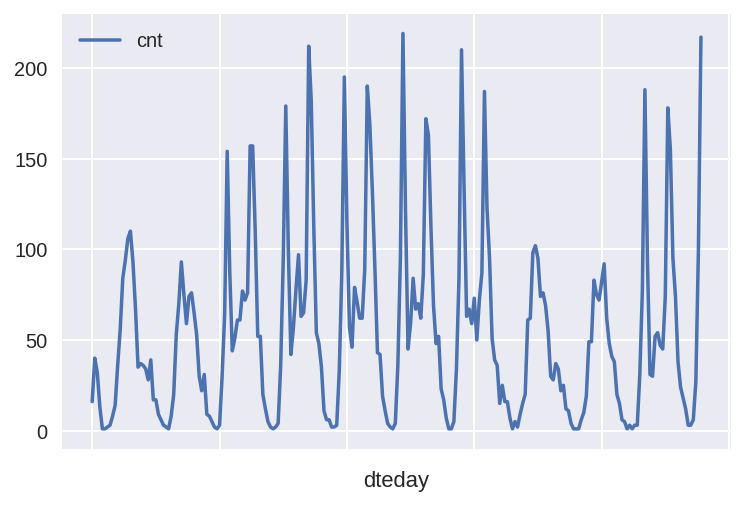

In [7]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy Variable

Season, weathersit, mnth, hr, weekday 등의 Categorical Variable들은 모델에 넣기 전에 Binary dummy variable로 만들 필요가 있다.

그리고 사용하지 않을 변수들은 제거하자.


익혀야 할 방법들
pd.get_dummies, pd.concat, (Pandas Dataframe).drop

In [8]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling target variables

mean shifting & Scaling : 평균을 0으로, 표준편차를 1로<br>
사실 scikit-learn에서 한방에 하는 방법도 있다.<br>
[Missing-Value처리](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html), [StandardScaling](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)<br>
연습삼아 직접 해보자!



In [0]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [10]:
'''
위에서 쓰인 Dictionary 잠깐 짚어보기.
Dictionary의 각각의 원소는 key : value 쌍으로 되어 있다.
'''

scaled_features

{'casual': [35.67621842453536, 49.30503038705308],
 'cnt': [189.46308763450142, 181.38759909186473],
 'hum': [0.6272288394038783, 0.19292983406291508],
 'registered': [153.78686920996606, 151.35728591258314],
 'temp': [0.4969871684216583, 0.1925561212497219],
 'windspeed': [0.1900976063064618, 0.12234022857279049]}

### Splitting the data into training, testing, and validation sets

맨 마지막의 21일을 test_set으로, 그리고 마지막의 81~22 (60일)을 validation set으로, 나머지를 Training set으로 둔다.<br>
물론 이것도 [scikit-learn에서 한방](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)에 할 수 있으나 우리는 직접한다!

굳이 Validations set을 왜 사용하는지는, 이론만 달리는 날에 신나고 자세하게 달립시다!

In [11]:
test_data = data[-21*24:]
val_data = data[-81*24:-21*24]
train_data = data[:-81*24]

target_fields = ['cnt', 'casual', 'registered']
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
val_features, val_targets = val_data.drop(target_fields, axis=1), val_data[target_fields]
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]

train_targets.head()

,cnt,casual,registered
0,-0.956312,-0.662736,-0.930162
1,-0.823998,-0.561326,-0.804632
2,-0.868103,-0.622172,-0.837666
3,-0.972851,-0.662736,-0.949983
4,-1.039008,-0.723582,-1.009445


### Pandas Dataframe to Numpy array

Scikit-learn 만 사용한다면 사실 필요없을 수 있는 과정이다. 하지만, 차후 Tensorflow로 넘어간다면 Numpy를 사용해야만 한다. (Pandas데이터 타입을 받질 못한다.)<br>
사실 링크된 Scikit-learn의 문서들을 보면 눈치챘을 수도 있는데, 거의 Numpy하고만 같이 사용되고 있다!<br>
[values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html)라는 방법을 사용할 것이다.

In [12]:
test_features, test_targets = test_features.values, test_targets.values
val_features, val_targets = val_features.values, val_targets.values
train_features, train_targets = train_features.values, train_targets.values

# 우리는 타겟 중 첫번째 컬럼(cnt)만 사용할 것이다.
test_cnt = test_targets[:,0]
val_cnt = val_targets[:,0]
train_cnt = train_targets[:,0]


print(train_targets, train_cnt)

[[-0.95631172 -0.662736   -0.93016249]
 [-0.82399838 -0.56132647 -0.80463169]
 [-0.86810283 -0.62217218 -0.83766611]
 ...
 [-0.82399838 -0.6830179  -0.76499039]
 [-0.07973581 -0.662736    0.12033204]
 [ 1.75059879 -0.54104456  2.27417616]] [-0.95631172 -0.82399838 -0.86810283 ... -0.82399838 -0.07973581
  1.75059879]


### Model Training : Simple Linear Regression

이제 데이터가 다 준비가 되었다!

해보자! 모델링!

In [0]:
'''
단순한 multivariate regression을 해보자!
'''
import time # 학습시간 측정용
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# 모델 준비
simple_regression = linear_model.LinearRegression()

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
simple_regression.fit(train_features, train_cnt )
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

# Training & Validation set에서의 예측값 준비
train_pred, val_pred = simple_regression.predict(train_features), simple_regression.predict(val_features)

----  0.05934sec, training complete  ----


In [15]:
# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred)))

Mean Squared Error on Training set : 0.30120
Mean Squared Error on Validation set : 0.46260
R-squared Score on Training set : 0.69078
R-squared Score on Validation set : 0.64146


### Check out on Test set

Golden rule : Test set을 모델 학습에 사용하지 말지어다.

Mean Squared Error on Test set : 0.36277
R-squared Score on Test set : 0.45262


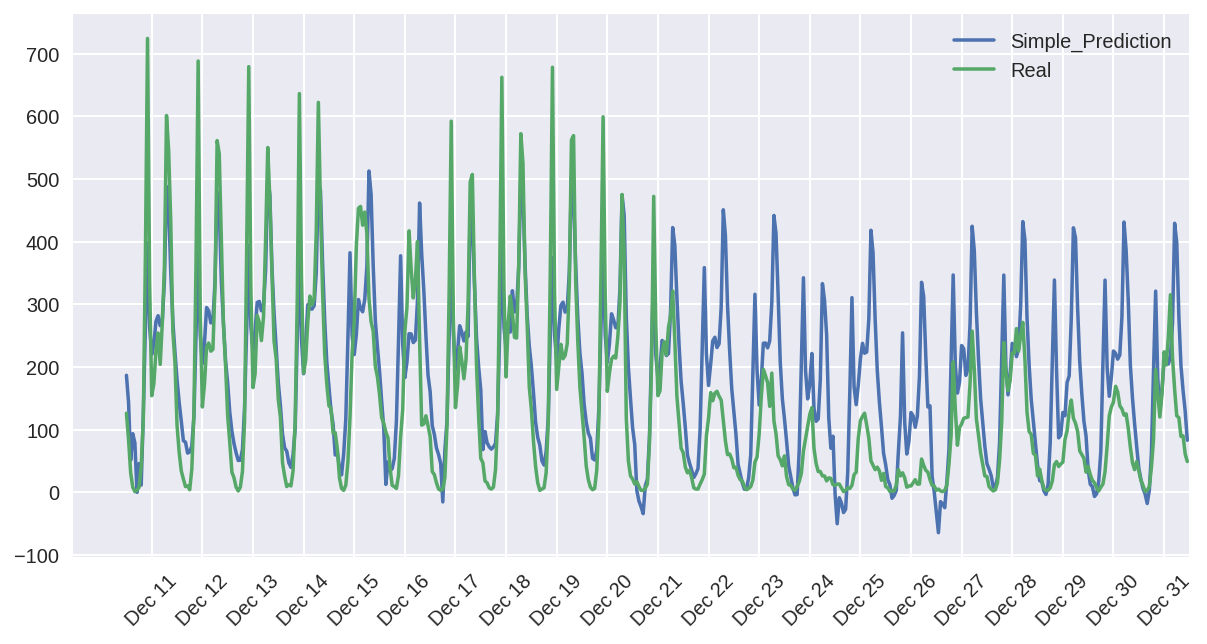

In [32]:
simple_predictions = simple_regression.predict(test_features)

fig, ax = plt.subplots(figsize=(10,5))

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']

ax.plot((simple_predictions)*std+mean, label = 'Simple_Prediction')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(simple_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, simple_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, simple_predictions)))

### Model Training : KNN Regression

[K-Nearest Neighbors Regression](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)


In [0]:
'''
Nearest-Neighbor Regression
'''

import time # 학습시간 측정용
from sklearn import neighbors

In [27]:
# 모델 준비
knn_regression = neighbors.KNeighborsRegressor(n_neighbors=5)

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
knn_regression.fit(train_features, train_cnt)
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

# Training & Validation set에서의 예측값 준비
train_pred2, val_pred2 = knn_regression.predict(train_features), knn_regression.predict(val_features)

----  0.04052sec, training complete  ----


In [28]:
# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred2)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred2)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred2)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred2)))

Mean Squared Error on Training set : 0.20459
Mean Squared Error on Validation set : 0.64175
R-squared Score on Training set : 0.78996
R-squared Score on Validation set : 0.50261


Mean Squared Error on Test set : 0.33837
R-squared Score on Test set : 0.48943


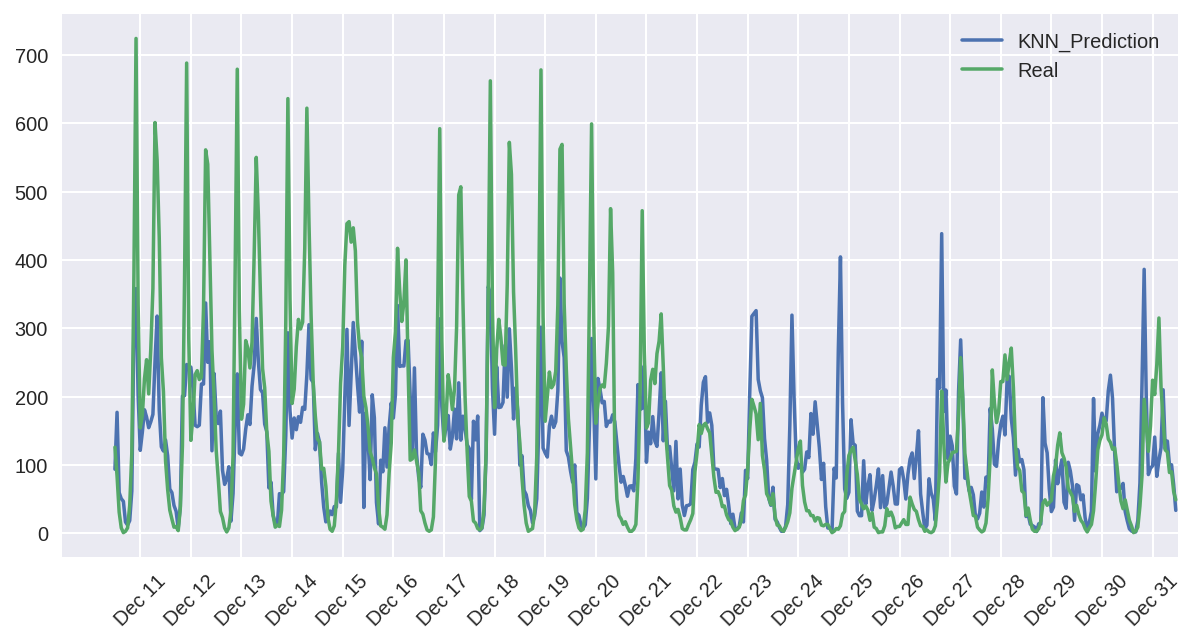

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

knn_predictions = knn_regression.predict(test_features)

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']

ax.plot(knn_predictions*std +mean, label = 'KNN_Prediction')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(simple_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, knn_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, knn_predictions)))

## 스스로 실습 01

이걸로 끝이 아니다.

위와 같은 과정을 싸이킷런의

[Support Vector Machine Regression](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR),  [Decision Tree Regression](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor), 

에도 적용하고 눈으로 확인해보자! 위 링크의 하단에는 각각 Examples가 있으니 적극활용해보자

위 방식들의 Regression이 끝이 나면 우리는 단순한 뉴럴네트워크를 이용한 Regression으로 넘어간다. [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)와 [Neural Network models (supervised)](http://scikit-learn.org/stable/modules/neural_networks_supervised.html)를 적극 참고하자

In [0]:
'''
사용한 컬럼의 갯수가 56개이다!
'''

train_features.shape

(15435, 56)

In [0]:
from sklearn.neural_network import MLPRegressor

In [44]:
# 모델 준비
'''
히든 레이어의 사이즈를 가지고 놀아보자. 학습하는데 시간을 측정해도 좋다.
'''
neural_regression = MLPRegressor(hidden_layer_sizes=(16),
                                activation = 'relu',
                                solver = 'adam',
                                learning_rate_init = 0.0001, #0.00001
                                max_iter = 500,
                                 random_state=2018
                                )

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
neural_regression.fit(train_features, train_cnt )
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))


# Training & Validation set에서의 예측값 준비
train_pred2, val_pred2 = neural_regression.predict(train_features), neural_regression.predict(val_features)



----  5.69966sec, training complete  ----


In [45]:
# Training & Validation set에서의 성능 확인

print("Mean Squared Error on Training set : {0:.5f}".format(mean_squared_error(train_cnt, train_pred2)  ))
print("Mean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(val_cnt, val_pred2)  ))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(train_cnt, train_pred2)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(val_cnt, val_pred2)))

Mean Squared Error on Training set : 0.06477
Mean Squared Error on Validation set : 0.17917
R-squared Score on Training set : 0.93350
R-squared Score on Validation set : 0.86114


Mean Squared Error on Test set : 0.21907
R-squared Score on Test set : 0.66945


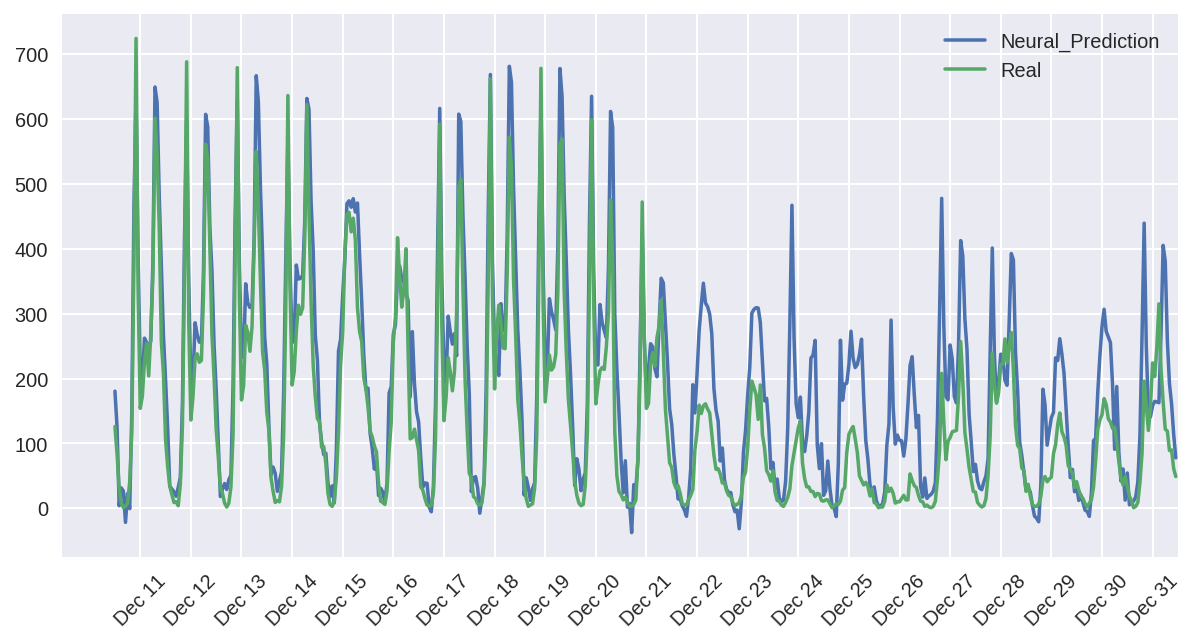

In [46]:
fig, ax = plt.subplots(figsize=(10,5))

# 예측값도 Scaling 되어 있으므로 그것을 원래대로 되돌려주는 과정
mean, std = scaled_features['cnt']
neural_predictions = neural_regression.predict(test_features)

ax.plot(neural_predictions*std+mean, label = 'Neural_Prediction')
ax.plot((test_cnt)*std+mean, label = 'Real')
ax.set_xlim(right = len(neural_predictions))
ax.legend()

dates = pd.to_datetime(rides.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

print("Mean Squared Error on Test set : {0:.5f}".format(mean_squared_error(test_cnt, neural_predictions)  ))
print("R-squared Score on Test set : {0:.5f}".format(r2_score(test_cnt, neural_predictions)))

## 스스로 실습 02

캐글의 입문 컴페티션중 하나인 [Boston House prices](https://www.kaggle.com/c/boston-housing)
데이터 셋을 가지고 집값을 예측해보자!




뉴럴넷을 이용한 회귀모델과, 다른 방식을 이용한 회귀모델을 만들어보자

In [47]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape,  boston.target.shape)
'''
feature 데이터는 boston.data에
target 데이터는 boston.target에 불러와진다.

scikit-learn에서는 datasets 안에 미리 연습용 데이터셋을 가지고 있다!
'''

(506, 13) (506,)


'\nfeature 데이터는 boston.data에\ntarget 데이터는 boston.target에 불러와진다.\n\nscikit-learn에서는 datasets 안에 미리 연습용 데이터셋을 가지고 있다!\n'

In [49]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21